In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model
import numpy as np
import h5py

from sklearn import metrics

In [2]:
#IMPORT DATA
train_dataset = h5py.File('train_signing.h5', "r")
train_set_x_orig = np.array(train_dataset["train_set_x"][:6150]) # your train set features
train_set_y_orig = np.array(train_dataset["train_set_y"][:6150]) # your train set labels

test_dataset = h5py.File('test_signing.h5', "r")
test_set_x_orig = np.array(test_dataset["test_set_x"][:1655]) # your test set features
test_set_y_orig = np.array(test_dataset["test_set_y"][:1655]) # your test set labels

train_set_y_orig = train_set_y_orig.reshape(train_set_x_orig.shape[0], 1)
test_set_y_orig = test_set_y_orig.reshape(test_set_x_orig.shape[0], 1)

In [3]:
# Reshape the training and test examples 
train_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten.T
test_x = test_x_flatten.T
train_y = train_set_y_orig
test_y = test_set_y_orig

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

print ("labels shape: " + str(train_y.shape))
#print("particular example: " + str(test_x_flatten[:, index]))
print(train_x.dtype)

train_x's shape: (6150, 14)
test_x's shape: (1655, 14)
labels shape: (6150, 1)
float64


In [4]:
#MODEL
model = Sequential()
model.add(Dense(14, activation='relu', input_dim=14))
model.add(Dense(28, activation='relu'))
model.add(Dense(14, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 14)                210       
_________________________________________________________________
dense_2 (Dense)              (None, 28)                420       
_________________________________________________________________
dense_3 (Dense)              (None, 14)                406       
_________________________________________________________________
dense_4 (Dense)              (None, 7)                 105       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 8         
Total params: 1,149
Trainable params: 1,149
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.fit(train_x,train_y,batch_size=16,epochs=400,shuffle=True, initial_epoch=0)

Epoch 1/400
6150/6150 [==============================] - 0s 56us/step - loss: 0.0988 - acc: 0.9654
Epoch 2/400
6150/6150 [==============================] - 0s 55us/step - loss: 0.0963 - acc: 0.9659
Epoch 3/400
6150/6150 [==============================] - 0s 52us/step - loss: 0.1012 - acc: 0.9637
Epoch 4/400
6150/6150 [==============================] - 0s 54us/step - loss: 0.1007 - acc: 0.9607
Epoch 5/400
6150/6150 [==============================] - 0s 50us/step - loss: 0.0966 - acc: 0.9641
Epoch 6/400
6150/6150 [==============================] - 0s 55us/step - loss: 0.0988 - acc: 0.9634
Epoch 7/400
6150/6150 [==============================] - 0s 53us/step - loss: 0.1008 - acc: 0.9636
Epoch 8/400
6150/6150 [==============================] - 0s 54us/step - loss: 0.0977 - acc: 0.9631
Epoch 9/400
6150/6150 [==============================] - 0s 55us/step - loss: 0.0997 - acc: 0.9615
Epoch 10/400
6150/6150 [==============================] - 0s 55us/step - loss: 0.0947 - acc: 0.9655
Epoch 11/

6150/6150 [==============================] - 0s 53us/step - loss: 0.0929 - acc: 0.9657
Epoch 84/400
6150/6150 [==============================] - 0s 53us/step - loss: 0.0918 - acc: 0.9646
Epoch 85/400
6150/6150 [==============================] - 0s 55us/step - loss: 0.0935 - acc: 0.9646
Epoch 86/400
6150/6150 [==============================] - 0s 53us/step - loss: 0.0952 - acc: 0.9637
Epoch 87/400
6150/6150 [==============================] - 0s 53us/step - loss: 0.0948 - acc: 0.9642
Epoch 88/400
6150/6150 [==============================] - 0s 53us/step - loss: 0.0946 - acc: 0.9641
Epoch 89/400
6150/6150 [==============================] - 0s 55us/step - loss: 0.0954 - acc: 0.9624
Epoch 90/400
6150/6150 [==============================] - 0s 60us/step - loss: 0.0970 - acc: 0.9654
Epoch 91/400
6150/6150 [==============================] - 0s 49us/step - loss: 0.0976 - acc: 0.9639
Epoch 92/400
6150/6150 [==============================] - 0s 51us/step - loss: 0.0944 - acc: 0.9646
Epoch 93/400


6150/6150 [==============================] - 0s 49us/step - loss: 0.1013 - acc: 0.9636
Epoch 246/400
6150/6150 [==============================] - 0s 52us/step - loss: 0.0890 - acc: 0.9659
Epoch 247/400
6150/6150 [==============================] - 0s 54us/step - loss: 0.0909 - acc: 0.9676
Epoch 248/400
6150/6150 [==============================] - 0s 54us/step - loss: 0.0918 - acc: 0.9668
Epoch 249/400
6150/6150 [==============================] - 0s 51us/step - loss: 0.0895 - acc: 0.9693
Epoch 250/400
6150/6150 [==============================] - 0s 53us/step - loss: 0.0898 - acc: 0.9659
Epoch 251/400
6150/6150 [==============================] - 0s 50us/step - loss: 0.0903 - acc: 0.9663
Epoch 252/400
6150/6150 [==============================] - 0s 52us/step - loss: 0.0874 - acc: 0.9670
Epoch 253/400
6150/6150 [==============================] - 0s 61us/step - loss: 0.0928 - acc: 0.9660
Epoch 254/400
6150/6150 [==============================] - 0s 52us/step - loss: 0.0915 - acc: 0.9646
Epoc

In [8]:
model.evaluate(test_x,test_y,batch_size=32,verbose=1)

1655/1655 [==============================] - 0s 30us/step


[0.7653565530634293, 0.8356495468277946]

In [7]:
model.save('multilayer_perceptron_7_rmsprop_700.h5')

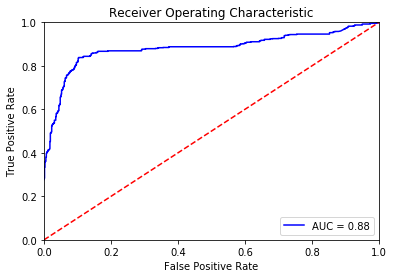

In [12]:
# create roc curve
probs = model.predict(test_x)
preds = probs
fpr, tpr, threshold = metrics.roc_curve(test_y, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()